In [1]:
import msprime, tskit
from IPython.display import SVG
import numpy as np
import matplotlib.pyplot as plt
from algorithm import *

In [2]:
ts = msprime.sim_ancestry(3, population_size=1000, sequence_length=1e6, recombination_rate=1e-8, random_seed=40,
                          record_full_arg=True)

In [4]:
sts = ts.simplify()
new_sts = ts.simplify(keep_unary=True)
ext_sts, _ = extend_edges(sts)

In [5]:
print("Number of edges:")
print(f" simplified: {sts.num_edges}")
print(f" keep unary: {new_sts.num_edges}")
print(f"   extended: {ext_sts.num_edges}")

Number of edges:
 simplified: 145
 keep unary: 1079
   extended: 125


# With 6 samples and 1e6 bp

In [5]:
res = []
for ts in msprime.sim_ancestry(3, population_size=1000, sequence_length=1e6, recombination_rate=1e-8, random_seed=40,
                          record_full_arg=True, num_replicates=100):
    sts = ts.simplify()
    new_sts = ts.simplify(keep_unary_if_coalescent=True)
    ext_sts, _ = extend_edges(sts)
    res.append((sts.num_edges, new_sts.num_edges, ext_sts.num_edges))

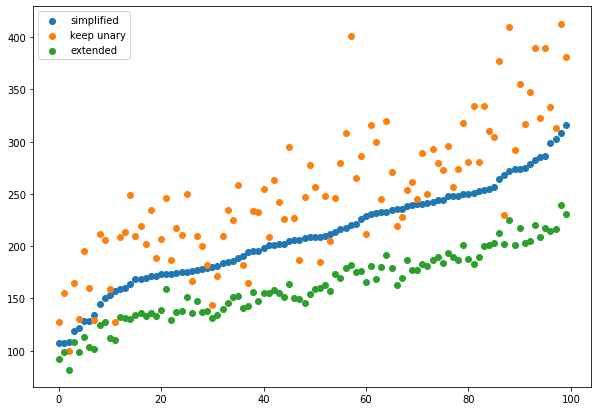

In [6]:
res = np.array(res)
x = np.argsort(np.argsort(res[:, 0]))

fig, ax = plt.subplots(figsize=(10,7))

ax.scatter(x, res[:, 0], label='simplified')
ax.scatter(x, res[:, 1], label='keep unary')
ax.scatter(x, res[:, 2], label='extended')
ax.legend();

# With 2000 samples

In [12]:
res = []
for ts in msprime.sim_ancestry(1000, population_size=1000, sequence_length=1e6, recombination_rate=1e-8, random_seed=40,
                          record_full_arg=True, num_replicates=20):
    sts = ts.simplify()
    new_sts = ts.simplify(keep_unary_if_coalescent=True)
    ext_sts, _ = extend_edges(sts)
    res.append((sts.num_edges, new_sts.num_edges, ext_sts.num_edges))

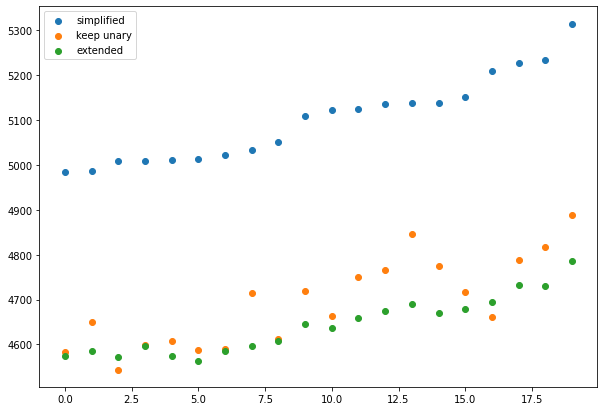

In [13]:
res = np.array(res)
x = np.argsort(np.argsort(res[:, 0]))

fig, ax = plt.subplots(figsize=(10,7))

ax.scatter(x, res[:, 0], label='simplified')
ax.scatter(x, res[:, 1], label='keep unary')
ax.scatter(x, res[:, 2], label='extended')
ax.legend();

# With 2000 samples and a genome of 1e7 bp

In [14]:
res = []
for ts in msprime.sim_ancestry(1000, population_size=1000, sequence_length=1e7, recombination_rate=1e-8, random_seed=40,
                          record_full_arg=True, num_replicates=4):
    sts = ts.simplify()
    new_sts = ts.simplify(keep_unary_if_coalescent=True)
    ext_sts, _ = extend_edges(sts)
    res.append((sts.num_edges, new_sts.num_edges, ext_sts.num_edges))

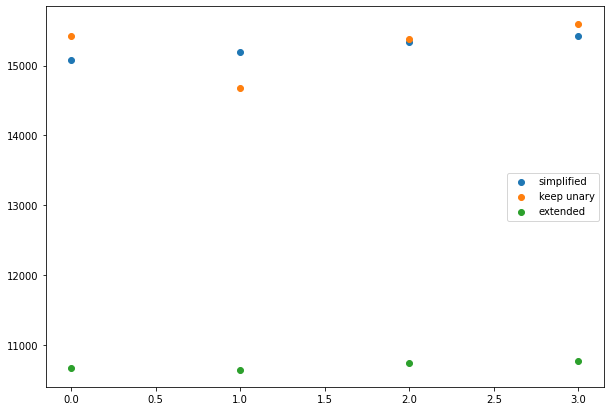

In [15]:
res = np.array(res)
x = np.argsort(np.argsort(res[:, 0]))

fig, ax = plt.subplots(figsize=(10,7))

ax.scatter(x, res[:, 0], label='simplified')
ax.scatter(x, res[:, 1], label='keep unary')
ax.scatter(x, res[:, 2], label='extended')
ax.legend();

# Experiment

In [17]:
res = {}
for num_samples in [10, 100, 1000]:
    res[num_samples] = {}
    for L in [1e6, 3e6, 6e6, 9e6]:
        ts = msprime.sim_ancestry(num_samples, population_size=1000, sequence_length=L,
                                  recombination_rate=1e-8, record_full_arg=True)
        sts = ts.simplify()
        new_sts = ts.simplify(keep_unary_if_coalescent=True)
        ext_sts, _ = extend_edges(sts)
        res[num_samples][L] = (sts.num_edges, new_sts.num_edges, ext_sts.num_edges)

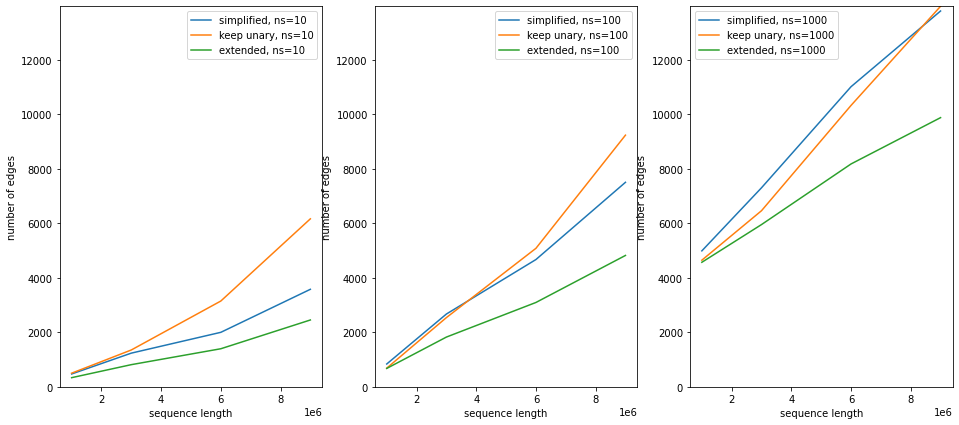

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(16, 7))

maxval = 0
for a in res.values():
    for b in a.values():
        maxval = max(maxval, max(b))

for ax, num_samples in zip(axes, res):
    Lvals = list(res[num_samples].keys())
    Lvals.sort()
    sim = [res[num_samples][L][0] for L in Lvals]
    new = [res[num_samples][L][1] for L in Lvals]
    ext = [res[num_samples][L][2] for L in Lvals]
    ax.plot(Lvals, sim, label=f"simplified, ns={num_samples}")
    ax.plot(Lvals, new, label=f"keep unary, ns={num_samples}")
    ax.plot(Lvals, ext, label=f"extended, ns={num_samples}")
    ax.set_xlabel("sequence length")
    ax.set_ylabel("number of edges")
    ax.set_ylim(0, maxval)
    ax.legend();

In [39]:
maxval

13969